HOMEWORK: 5 | MATPLOTLIB | PYBER | BY: BRANDON STEINKE  

THREE OBSERVABLE TRENDS:
        #1.) While urban areas show substantially more drivers, and rides, than the suburban and rural areas, the average fare amount for rural areas is significantly more than both. The average fare of rural being 41.19% higher than urban and 14.89% higher than suburban. Without more data, one can only speculate that increased ride demand and shorter ride duration may be why the average fare is substantially lower in suburban areas and the inverse for why the average fare is higher in rural areas. Ride duration or distance is probably the biggest factor determining the overall average fare in all areas, however surge pricing and carpool opportunities in urban areas are also probably key factors (yet this data does not contain such information).
       #2.) For three city types evaluated the allocation of 'total drivers' are as such, Urban 80.9%, Suburban 16.5%, Rural 2.6%.  It's clear that the occupation of a ‘Ride Share Driver' is significantly more common in urban areas, compared to the others. It roughly 5x times more common than suburban, and 31x times more common than rural areas.
       #3.)  For the three city types evaluated the allocation of 'total rides' are as such Urban 68.4%, Suburban 26.3%, Rural 5.3%. Again this data shows that for the period, it was significantly more likely that people utilized ride share services in urban areas compared to the others. Uber was started in San Francisco as a way to make the model of utilizing Taxi Cabs more user friendly. It is reasonable to deduce that the phenomenon and business model of ride share, would be greater in city/urban areas and spread out from there to adjacent city types.


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.figure import Figure
# Read the City and Ride Data
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")
#print(city_df.head(3))
#print(ride_df.head(3))

# Combine the data into a single dataset
# Display the data table for preview
mrg1_ = pd.merge(city_df, ride_df, how = 'outer', on= 'city')
mrg1_.to_csv("merge_drivedat.csv", encoding="utf-8", index=False, header=True)
#print(mrg1_.head(5))
mrg1_.head(5)
#mrg1_.columns


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#mrg1_ = mrg1_.sort_values(by='driver_count', ascending=False)
mrgA_grp = mrg1_.groupby(['city', 'type'])
type_cts = mrgA_grp['type'].value_counts()
avg_fare = mrgA_grp['fare'].mean()
#print( mrg1_grp['fare'].mean())


In [3]:
mgr2adf = pd.DataFrame( { 
                        #'number of rides' : mrg1_grp['type'].value_counts(),
                         #'avg_fare' :  mrgA_grp['fare'].mean() 
                      } ) 
mgr2bdf =  pd.DataFrame( { 
                        'avg_fare' :  mrgA_grp['fare'].mean() ,
                        'number of rides' : mrgA_grp['type'].count(),
                        'drive count' : mrgA_grp['driver_count'].unique(),
                        'fares' : mrgA_grp['fare'].sum()
                        } ) 
#mgr2bdf['drive count']=mgr2bdf['drive count'].str.replace('[', '')
mgr2bdf['drive count'] = mgr2bdf['drive count'].str[0]
#mgr2bdf['drive count'] = pd.to_numeric(mgr2bdf['drive count'],errors='ignore')
print(mgr2bdf.head())
mgr2cdf = mgr2bdf
mgr2cdf.reset_index(level=1, inplace =True)
#print(mgr2bdf.head(3))
#print(mgr2cdf.head(3))
#print(mgr2cdf.columns)
mgr2cdf = mgr2cdf.sort_values(by='type' , ascending = False)
mgr2cdf.head(5)
urban_gp = mgr2cdf.loc[mgr2cdf['type']=='Urban',:]
suburban_gp = mgr2cdf.loc[mgr2cdf['type']=='Suburban',:]
rural_gp = mgr2cdf.loc[mgr2cdf['type']=='Rural',:]


                         avg_fare  number of rides  drive count   fares
city          type                                                     
Amandaburgh   Urban     24.641667               18           12  443.55
Barajasview   Urban     25.332273               22           26  557.31
Barronchester Suburban  36.422500               16           11  582.76
Bethanyland   Suburban  32.956111               18           22  593.21
Bradshawfurt  Rural     40.064000               10            7  400.64


In [4]:
mgr2cdf.head(5)

,type,avg_fare,number of rides,drive count,fares
city,,,,,
Amandaburgh,Urban,24.641667,18,12,443.55
Rodneyfort,Urban,28.616957,23,34,658.19
Roberthaven,Urban,23.729167,24,47,569.50
Richardfort,Urban,22.373214,28,38,626.45
Reynoldsfurt,Urban,21.919474,19,67,416.47


## Bubble Plot of Ride Sharing Data

In [5]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPatch

#v=mpatches.Circle( (0.5, 0.5), 0.25, facecolor='orangered',edgecolor="red", linewidth=2)  
alls =  [ 
Line2D([0], [0],  marker='o', color='w', label = 'Urban',   mec ='k', mew =1.5,  markerfacecolor='coral',     markersize=6, alpha=.6 ),  
Line2D([0], [0],  marker='o', color='w', label = 'Suburban',mec ='k', mew =1.5,  markerfacecolor='skyblue',   markersize=6, alpha=.7 ),  
Line2D([0], [0],  marker='o', color='w', label = 'Rural' ,  mec ='k', mew =1.5,  markerfacecolor='gold',      markersize=6, alpha=.7 )  
]


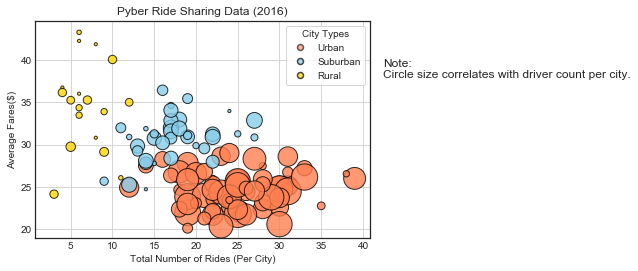

In [65]:
with plt.style.context(('seaborn-white')):  # !! -- I NOW RUN JUPYTER NOTEBOOK DARK MODE AND HAVE TO SET WHITE BACKGROUNDS FOR MY CHARTS -- !!
    plt.scatter(   urban_gp['number of rides'],      urban_gp['avg_fare'],      urban_gp['drive count']*10,  c='coral',    alpha=.8, edgecolor = 'k', linewidth=1 )
    plt.scatter(suburban_gp['number of rides'],   suburban_gp['avg_fare'],   suburban_gp['drive count']*10,  c='skyblue',  alpha=.8, edgecolor = 'k', linewidth=1 )
    plt.scatter(   rural_gp['number of rides'],      rural_gp['avg_fare'],      rural_gp['drive count']*10,  c='gold',     alpha=.8, edgecolor = 'k', linewidth=1 )
    plt.grid()
    plt.title("Pyber Ride Sharing Data (2016)", clip_on =True) # TITLE OF CHART
    plt.xlabel("Total Number of Rides (Per City)")  # LABEL THE X AXIS
    plt.ylabel("Average Fares($)") # LABEL THE Y AXIS
    plt.legend( handles = alls, title = 'City Types', loc="best", frameon = True)
    #plt.legend(labels=['Urban', 'Suburban', 'Rural'],  title = 'City Types', loc="best")
    plt.autoscale()# make chart fit any cell or window size ,    #plt.tight_layout() # avoid overlapping labels 
    plt.suptitle('Note:\nCircle size correlates with driver count per city.', fontsize=12, x=.93, y=.75, horizontalalignment='left')
    plt.savefig("Pyber_Bubble_BS.png")
    plt.show()


## Total Fares by City Type

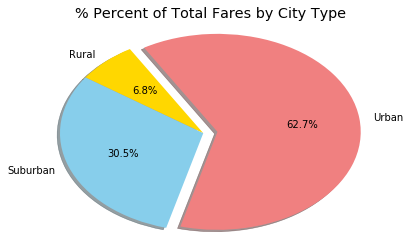

In [36]:
# Calculate Type Percents
urb__fare_t = urban_gp["fares"].sum()
surb_fare_t = suburban_gp["fares"].sum()
rur__fare_t = rural_gp["fares"].sum()
fare_t  = urb__fare_t + surb_fare_t + rur__fare_t
#print('Percent of Total Fares by City Type')
#print(f'urban {urb__fare_t/fare_t} % , suburban {surb_fare_t/fare_t} % , rural {rur__fare_t/fare_t} %'  )
with plt.style.context(('ggplot')):
    # Build Pie Chart
    labels= ['Urban',  'Rural', 'Suburban']
    vals = [urb__fare_t, rur__fare_t, surb_fare_t ]
    colors = ['lightcoral', 'gold','skyblue']
    explode = [ .1, 0, 0]
    plt.pie(vals,explode=explode, labels=labels, colors=colors,  autopct="%1.1f%%", shadow=True ,  startangle= 255,)
    plt.axis("tight")
    plt.title('% Percent of Total Fares by City Type')
    # Save Figure
    plt.savefig("pyber_percent_tot_fares_BS.png")
    plt.show()

In [16]:
# Show Figure
print(f'the average fare for urban is:    {urban_gp["fares"].sum() /urban_gp["number of rides"].sum() } ')
print(f'the average fare for suburban is: {suburban_gp["fares"].sum() /suburban_gp["number of rides"].sum()} ')
print(f'the average fare for rural is:    {rural_gp["fares"].sum() /rural_gp["number of rides"].sum()} ')    
   
print('the % average fare increase of rural from urban')
print(   ((34.62 - 24.52)/(24.52))*100   )
print('the % average fare increase of rural from suburban')
print(   ((34.62 - 30.97)/(24.52))*100   )      

the average fare for urban is:    24.52577230769231 
the average fare for suburban is: 30.970128000000003 
the average fare for rural is:    34.62344 
the % average fare increase of rural from urban
41.19086460032626
the % average fare increase of rural from suburban
14.885807504078297


## Total Rides by City Type

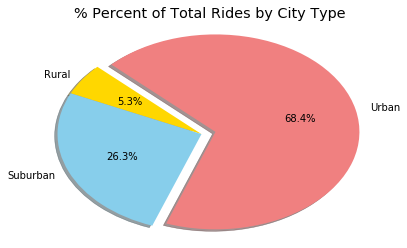

In [37]:
# Calculate Ride Percents
urb__ride_t  = urban_gp["number of rides"].sum()
surb_ride_t  = suburban_gp["number of rides"].sum()
rur__ride_t  = rural_gp["number of rides"].sum()
ride_t       = urb__ride_t  + surb_ride_t  + rur__ride_t

with plt.style.context(('ggplot')):
#plt.style.use('ggplot') # insert this line in the cell for the chart
    #print(plt.style.available) # print this to see all options for parameter you can pass into plt.style.use() 
# Build Pie Chart
    labelss = ['Urban',  'Rural', 'Suburban']
    valss   = [urb__ride_t, rur__ride_t, surb_ride_t ]
    #colorss = ['coral', 'gold','skyblue'] #['lightcoral', 'gold','skyblue']
    colorss = ['lightcoral', 'gold','skyblue'] # !! TAs  I HAD TO USE LIGHTCORAL TO MATCH SAMPLE, CORAL COMES OUT ORANGE ON MY OUTPUT!!
    explodes= [ .1, 0, 0]
    plt.pie(valss, explode=explodes, labels=labelss, colors=colorss,  autopct="%1.1f%%", shadow=True , startangle= 250)
    plt.axis("tight")
    plt.title('% Percent of Total Rides by City Type')
    plt.savefig("pyber_percent_tot_Rides_BS.png")
    plt.show()
# Save Figure

## Total Drivers by City Type

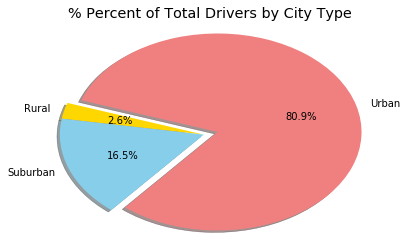

In [38]:
# Calculate Driver Percents
urb__driver_t = urban_gp["drive count"].sum()
surb_driver_t = suburban_gp["drive count"].sum()
rur__driver_t = rural_gp["drive count"].sum()
driver_t = urb__driver_t + surb_driver_t + rur__driver_t
#print('Percent of Total Drivers by City Type')
#print(f'{urb__driver_t/driver_t} % , {surb_driver_t/driver_t} %, {rur__driver_t/driver_t} %' )
with plt.style.context(('ggplot')):  
    # Build Pie Chart
    labelz = ['Urban',  'Rural', 'Suburban']
    valz   = [urb__driver_t, rur__driver_t, surb_driver_t ]
    colorz = ['lightcoral', 'gold','skyblue']
    explodez= [ .1, 0, 0]
    plt.pie(valz,explode=explodez, labels=labelz, colors=colorz,  autopct="%1.1f%%", shadow=True ,  startangle= 230,)
    plt.axis("auto")
    plt.title('% Percent of Total Drivers by City Type' )#, backgroundcolor = 'white')
    # Save Figure
    plt.savefig("pyber_percent_tot_drivers_BS.png")
    plt.show()


[|| THE BONE YARD -- EXTRA CODE ||| 
=
/// I am not sure this is correct below --- rural seems like it would be 40     
print(f'the median fare for urban is    {  ( ( urban_gp["fares"].sum()+ 1) / 2 ) /( (urban_gp["number of rides"].sum() + 1) / 2 )} ')
print(f'the median fare for suburban is  {  ( ( suburban_gp["fares"].sum()+ 1) / 2 ) /( (suburban_gp["number of rides"].sum() + 1) / 2 )} ')
print(f'the median fare for rural is    {  ( ( rural_gp["fares"].sum()+ 1) / 2 ) /( (rural_gp["number of rides"].sum() + 1) / 2 )} ')    
urban_gpfull = mrg1_.loc[mrg1_['type']=='Urban',:] 
mins = urban_gpfull["fare"].min()
maxs = urban_gpfull["fare"].max()
print(f'urban median avg fare is {( (  mins + maxs) /2 )} ')        
suburban_gpfull = mrg1_.loc[mrg1_['type']=='Suburban',:] 
minss = suburban_gpfull["fare"].min()
maxss = suburban_gpfull["fare"].max()
print(f'suburban median avg fare is {( (  minss + maxss) /2 )} ')      
rural_gpfull = mrg1_.loc[mrg1_['type']=='Rural',:] 
minsss = rural_gpfull["fare"].min()
maxsss = rural_gpfull["fare"].max()
print(f'rural median avg fare is {( (  minsss + maxsss) /2 )} ')  

urb__ride_t  = urban_gp["number of rides"].sum()
surb_ride_t  = suburban_gp["number of rides"].sum()
rur__ride_t  = rural_gp["number of rides"].sum()

urb__fare_t = urban_gp["fares"].sum()
surb_fare_t = suburban_gp["fares"].sum()
rur__fare_t = rural_gp["fares"].sum()

urb__driver_t = urban_gp["drive count"].sum()
surb_driver_t = suburban_gp["drive count"].sum()
rur__driver_t = rural_gp["drive count"].sum()

driver_t = urb__drive_t + surb_drive_t + rur__drive_t
ride_t   = urb__ride_t  + surb_ride_t  + rur__ride_t
fare_t  = urb__fare_t + surb_fare_t + rur__fare_t
print()
print('Percent of Total Fares by City Type')
print(f'urban {urb__fare_t/fare_t} % , suburban {surb_fare_t/fare_t} % , rural {rur__fare_t/fare_t} %'  )
print()
print('Percent of Total Rides by City Type')
print(f'{urb__ride_t/ride_t} % , {surb_ride_t/ride_t} %, {rur__ride_t/ride_t} %' )
print()
print('Percent of Total Drivers by City Type')
print(f'{urb__driver_t/driver_t} % , {surb_driver_t/driver_t} %, {rur__driver_t/driver_t} %' )